In [3]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# Define run numbers
run_raw = 23913
run_dummy = 23933

# Toggle to apply pion selection cuts
apply_cuts = True

# File paths SHMS
raw_data_path = f'/net/cdaq/cdaql3data/cdaq/hallc-online-rsidis2025/ROOTfiles/shms_coin_replay_production_{run_raw}_-1.root'
dummy_data_path = f'/net/cdaq/cdaql3data/cdaq/hallc-online-rsidis2025/ROOTfiles/shms_coin_replay_production_{run_dummy}_-1.root'

# File paths HMS
# raw_data_path = f'/net/cdaq/cdaql3data/cdaq/hallc-online-rsidis2025/ROOTfiles/hms_coin_replay_production_{run_raw}_-1.root'
# dummy_data_path = f'/net/cdaq/cdaql3data/cdaq/hallc-online-rsidis2025/ROOTfiles/hms_coin_replay_production_{run_dummy}_-1.root'

# File paths COIN
# raw_data_path = f'/net/cdaq/cdaql3data/cdaq/hallc-online-rsidis2025/ROOTfiles/shms_coin_replay_production_{run_raw}_-1.root'
# dummy_data_path = f'/net/cdaq/cdaql3data/cdaq/hallc-online-rsidis2025/ROOTfiles/shms_coin_replay_production_{run_dummy}_-1.root'

# Defining extracted variables
variables = ["P.cal.etottracknorm", "P.hgcer.npeSum", "CTime.ePiCoinTime_ROC1"]

# Function to load data from ROOT files
def load_data(file_path):
    file = uproot.open(file_path)
    tree = file['T']
    return tree.arrays(variables, library="np")

# Load raw and dummy data
data_raw = load_data(raw_data_path)
data_dummy = load_data(dummy_data_path)

# Extract relevant variables
cal_raw, hgcer_raw, coincidence_time_raw = data_raw['P.cal.etottracknorm'], data_raw['P.hgcer.npeSum'], data_raw['CTime.ePiCoinTime_ROC1']
cal_dummy, hgcer_dummy, coincidence_time_dummy = data_dummy['P.cal.etottracknorm'], data_dummy['P.hgcer.npeSum'], data_dummy['CTime.ePiCoinTime_ROC1']

# Define pion selection cuts
def apply_pion_cuts(cal, hgcer, coincidence_time):
    cut = (cal < 0.8) & (hgcer < 1)
    return coincidence_time[cut]

if apply_cuts:
    coincidence_time_raw = apply_pion_cuts(cal_raw, hgcer_raw, coincidence_time_raw)
    coincidence_time_dummy = apply_pion_cuts(cal_dummy, hgcer_dummy, coincidence_time_dummy)

# Define histogram settings
bin_min, bin_max, bin_number = 20, 60, 100
bins = np.linspace(bin_min, bin_max, bin_number + 1)

# Plot raw data
counts_raw, bin_edges, _ = plt.hist(coincidence_time_raw, bins=bins, histtype='step', color='red', label=f'Raw Data Run {run_raw}', alpha=0.5, linewidth=2)

# Plot dummy data
counts_dummy, _, _ = plt.hist(coincidence_time_dummy, bins=bins, histtype='step', color='blue', label=f'Dummy Data Run {run_dummy}', alpha=0.5, linewidth=2)

# Subtract dummy data from raw data
counts_subtracted = counts_raw - counts_dummy

# Plot subtracted data
plt.hist(bin_edges[:-1], bins=bins, weights=counts_subtracted, histtype='step', color='green', alpha=0.5, label='Raw - Dummy', linewidth=2)

# Customize the plot
plt.xlabel('Coincidence Time (ns)')
plt.ylabel('Counts')
plt.title(f'Dummy Subtraction of Coincidence Time Spectra for Pi- (Runs {run_raw} - {run_dummy})')
plt.legend()
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/net/cdaq/cdaql3data/cdaq/hallc-online-rsidis2025/ROOTfiles/shms_coin_replay_production_23913_-1.root'

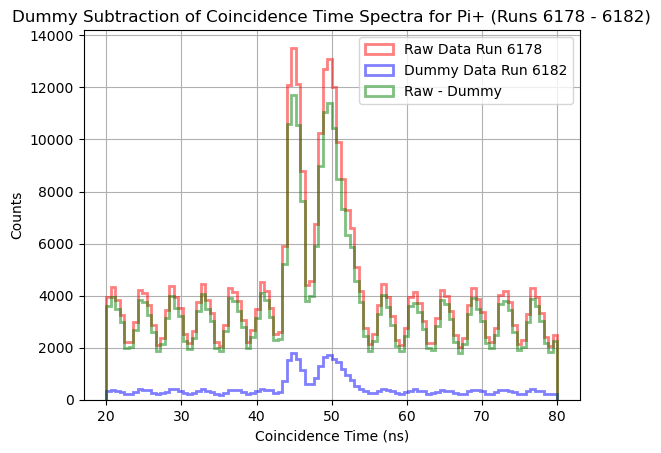

In [5]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# Define run numbers
run_raw = 6178
run_dummy = 6182

# Toggle to apply pion selection cuts
apply_cuts = True

# Define file paths dynamically
raw_data_path = f'/work/hallc/c-rsidis/gaskelld/example_output/coin_replay_production_{run_raw}_-1.root'
dummy_data_path = f'/work/hallc/c-rsidis/gaskelld/example_output/coin_replay_production_{run_dummy}_-1.root'

# Define variables to extract
variables = ["P.cal.etottracknorm", "P.hgcer.npeSum", "CTime.ePiCoinTime_ROC1"]

# Function to load data from ROOT files
def load_data(file_path):
    file = uproot.open(file_path)
    tree = file['T']
    return tree.arrays(variables, library="np")

# Load raw and dummy data
data_raw = load_data(raw_data_path)
data_dummy = load_data(dummy_data_path)

# Extract relevant variables
cal_raw, hgcer_raw, coincidence_time_raw = data_raw['P.cal.etottracknorm'], data_raw['P.hgcer.npeSum'], data_raw['CTime.ePiCoinTime_ROC1']
cal_dummy, hgcer_dummy, coincidence_time_dummy = data_dummy['P.cal.etottracknorm'], data_dummy['P.hgcer.npeSum'], data_dummy['CTime.ePiCoinTime_ROC1']

# Define pion selection cuts
def apply_pion_cuts(cal, hgcer, coincidence_time):
    cut = (cal < 0.8) & (hgcer < 1)
    return coincidence_time[cut]

if apply_cuts:
    coincidence_time_raw = apply_pion_cuts(cal_raw, hgcer_raw, coincidence_time_raw)
    coincidence_time_dummy = apply_pion_cuts(cal_dummy, hgcer_dummy, coincidence_time_dummy)

# Define histogram settings
bin_min, bin_max, bin_number = 20, 80, 100
bins = np.linspace(bin_min, bin_max, bin_number + 1)

# Plot raw data
counts_raw, bin_edges, _ = plt.hist(coincidence_time_raw, bins=bins, histtype='step', color='red', label=f'Raw Data Run {run_raw}', alpha=0.5, linewidth=2)

# Plot dummy data
counts_dummy, _, _ = plt.hist(coincidence_time_dummy, bins=bins, histtype='step', color='blue', label=f'Dummy Data Run {run_dummy}', alpha=0.5, linewidth=2)

# Subtract dummy data from raw data
counts_subtracted = counts_raw - counts_dummy

# Plot subtracted data
plt.hist(bin_edges[:-1], bins=bins, weights=counts_subtracted, histtype='step', color='green', alpha=0.5, label='Raw - Dummy', linewidth=2)

# Customize the plot
plt.xlabel('Coincidence Time (ns)')
plt.ylabel('Counts')
plt.title(f'Dummy Subtraction of Coincidence Time Spectra for Pi+ (Runs {run_raw} - {run_dummy})')
plt.legend()
plt.grid(True)
plt.show()